
# Projet 2

In [2]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [3]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
 10  Latitude          36742 non-null  float64
 11  Longitude         36742 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.6+ MB


In [4]:
#geo_shape = forme du bâtiment ou de la zone correspondant au chef lieu sur googlemap par exemple.
#voir lien pour plus de détails --> https://kb.narrative.io/what-is-a-location-polygon

**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [5]:
# Verification que le dataset ne contient pas de champs non remplis - nombre de ligne = constant --> dataset = clean
geo.dropna(axis=0, inplace=True)
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
 10  Latitude          36742 non-null  float64
 11  Longitude         36742 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.6+ MB


In [6]:
# Verification des types de données du data set
geo.dtypes

Code Postal          object
Commune              object
Département          object
Région               object
Statut               object
Altitude Moyenne    float64
Superficie          float64
Population          float64
geo_point_2d         object
geo_shape            object
Latitude            float64
Longitude           float64
dtype: object

In [7]:
new_column = geo['Code Postal'] + ' ' + geo['Commune']
geo = pd.concat([geo, new_column], axis=1)
geo.rename(columns = {0:'TEST'}, inplace = True)
geo.head(1)

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,TEST
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT


In [8]:
# fonction recherche de ville

# HYPOTHESES --> France = petit pays, donc on peut considérer un référentiel plan XY ou X = long et Y = lat
# Dans ce cas de figure le point le plus proche d'un point A est le 
# vecteur AX, ou X est une ville, dont la norme est la plus faible.

def ville(lat, long):
    norm = np.sqrt((geo['Latitude']-lat)**2 + (geo['Longitude']-long)**2)
    liste_vp = pd.concat([new_column, norm], axis=1)
    liste_vp.rename(columns={0: "CP + ville", 1 : "Norme"}, inplace=True)    
    liste_vp = liste_vp.sort_values(by=['Norme'])
    
    return liste_vp["CP + ville"][1]

In [9]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [18]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

46.76860963770232 5.341764749037324


,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,TEST,geo_shape_type,geo_shape_cd_nb
Code INSEE,,,,,,,,,,,,,,,
71534,71330,LE TARTRE,SAONE-ET-LOIRE,BOURGOGNE,Commune simple,198.0,384.0,0.1,"46.7429466505, 5.35271245031","{""type"": ""Polygon"", ""coordinates"": [[[5.361726...",46.742947,5.352712,71330 LE TARTRE,Polygon,1


In [11]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'91140 VILLEBON-SUR-YVETTE'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [12]:
# Utiliser la librairie Python json pour parser la colonne "geo_shape".
# Donner le décompte des valeurs accédées avec la clé "type".


import json

liste_de_types = [json.loads(i).get('type') for i in geo['geo_shape']]
set_de_types = set(liste_de_types)
geo['geo_shape_type'] = liste_de_types

for compteur in set_de_types:
    print(compteur, ':', liste_de_types.count(compteur))

Polygon : 36670
MultiPolygon : 72


In [13]:
# Donner le décompte des longueurs des listes accédées avec la clé "coordinates".

liste_de_cd_lg = [len(json.loads(i).get('coordinates')) for i in geo['geo_shape']]
geo['geo_shape_cd_nb'] = liste_de_cd_lg            

set(liste_de_cd_lg)

{1, 2, 3, 4}

In [20]:
# Quelle commune est la plus complexe géométriquement ?

geo.loc[(geo['geo_shape_cd_nb'] == geo['geo_shape_cd_nb'].max())]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,TEST,geo_shape_type,geo_shape_cd_nb
Code INSEE,,,,,,,,,,,,,,,
83069,83400,HYERES,VAR,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,60.0,13356.0,54.7,"43.1018713534, 6.18898508469","{""type"": ""MultiPolygon"", ""coordinates"": [[[[6....",43.101871,6.188985,83400 HYERES,MultiPolygon,4


In [21]:
# Quelle commune est la seconde la plus complexe géométriquement ?

geo.loc[(geo['geo_shape_cd_nb'] == geo['geo_shape_cd_nb'].max()-1)]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,TEST,geo_shape_type,geo_shape_cd_nb
Code INSEE,,,,,,,,,,,,,,,
27701,27100,VAL-DE-REUIL,EURE,HAUTE-NORMANDIE,Chef-lieu canton,23.0,2593.0,13.5,"49.261335704, 1.21147195365","{""type"": ""MultiPolygon"", ""coordinates"": [[[[1....",49.261336,1.211472,27100 VAL-DE-REUIL,MultiPolygon,3


In [22]:
# Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

polygon_cd2 = geo.loc[(geo['geo_shape_cd_nb'] == 2) & (geo['geo_shape_type'] == 'Polygon')]['Commune']
polygon_cd2

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

In [23]:
# Pour ces villes vérifier que le premier polygone contient bien le second (enclave). 
#NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. 
#Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire 
#"Library/bin" de votre environnement Python.

import shapely.geometry as sha

geo['cds'] = [json.loads(i).get('coordinates') for i in geo['geo_shape']]
geo.head(1)

polygon_enclave = geo.loc[(geo['geo_shape_cd_nb'] == 2) & (geo['geo_shape_type'] == 'Polygon')]
polygon_enclave

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,TEST,geo_shape_type,geo_shape_cd_nb,cds
Code INSEE,,,,,,,,,,,,,,,,
02232,02600,COYOLLES,AISNE,PICARDIE,Commune simple,126.0,2489.0,0.4,"49.2133089693, 3.01306173751","{""type"": ""Polygon"", ""coordinates"": [[[3.037897...",49.213309,3.013062,02600 COYOLLES,Polygon,2,"[[[3.037897560658703, 49.16921270775551], [3.0..."
05052,05600,EYGLIERS,HAUTES-ALPES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,1615.0,2987.0,0.7,"44.6925244966, 6.66688741371","{""type"": ""Polygon"", ""coordinates"": [[[6.719912...",44.692524,6.666887,05600 EYGLIERS,Polygon,2,"[[[6.719912606601575, 44.70392733592357], [6.7..."
09042,09240,LA BASTIDE-DE-SEROU,ARIEGE,MIDI-PYRENEES,Chef-lieu canton,479.0,4138.0,1.0,"43.0242795037, 1.42677885373","{""type"": ""Polygon"", ""coordinates"": [[[1.423960...",43.024280,1.426779,09240 LA BASTIDE-DE-SEROU,Polygon,2,"[[[1.423960819701936, 42.99550854650971], [1.4..."
22209,22650,PLOUBALAY,COTES-D'ARMOR,BRETAGNE,Chef-lieu canton,36.0,3600.0,2.7,"48.5596688192, -2.12838362694","{""type"": ""Polygon"", ""coordinates"": [[[-2.11237...",48.559669,-2.128384,22650 PLOUBALAY,Polygon,2,"[[[-2.11237709725211, 48.52896113651634], [-2...."
2A272,20100,SARTENE,CORSE-DU-SUD,CORSE,Sous-préfecture,190.0,20182.0,3.1,"41.5718443328, 8.93538107497","{""type"": ""Polygon"", ""coordinates"": [[[8.940487...",41.571844,8.935381,20100 SARTENE,Polygon,2,"[[[8.940487655060174, 41.490088793265336], [8...."
2B049,20214,CALENZANA,HAUTE-CORSE,CORSE,Chef-lieu canton,596.0,18465.0,2.1,"42.4784267166, 8.80369225001","{""type"": ""Polygon"", ""coordinates"": [[[8.911220...",42.478427,8.803692,20214 CALENZANA,Polygon,2,"[[[8.911220447280732, 42.41019895400797], [8.8..."
48080,48300,LANGOGNE,LOZERE,LANGUEDOC-ROUSSILLON,Chef-lieu canton,973.0,3124.0,3.1,"44.7237405653, 3.83363110341","{""type"": ""Polygon"", ""coordinates"": [[[3.850531...",44.723741,3.833631,48300 LANGOGNE,Polygon,2,"[[[3.850531831651621, 44.68745054452225], [3.8..."
67486,67920,SUNDHOUSE,BAS-RHIN,ALSACE,Commune simple,166.0,1590.0,1.5,"48.2550723499, 7.63031906582","{""type"": ""Polygon"", ""coordinates"": [[[7.594939...",48.255072,7.630319,67920 SUNDHOUSE,Polygon,2,"[[[7.594939251325704, 48.23228567615893], [7.5..."
68078,68420,EGUISHEIM,HAUT-RHIN,ALSACE,Commune simple,320.0,1400.0,1.6,"48.0371183049, 7.30052876111","{""type"": ""Polygon"", ""coordinates"": [[[7.281156...",48.037118,7.300529,68420 EGUISHEIM,Polygon,2,"[[[7.281156117554148, 48.02598189605906], [7.2..."


In [24]:
polygon_liste = list(polygon_enclave['cds'])

In [25]:
# Plot des polygones

import matplotlib.pyplot as plt

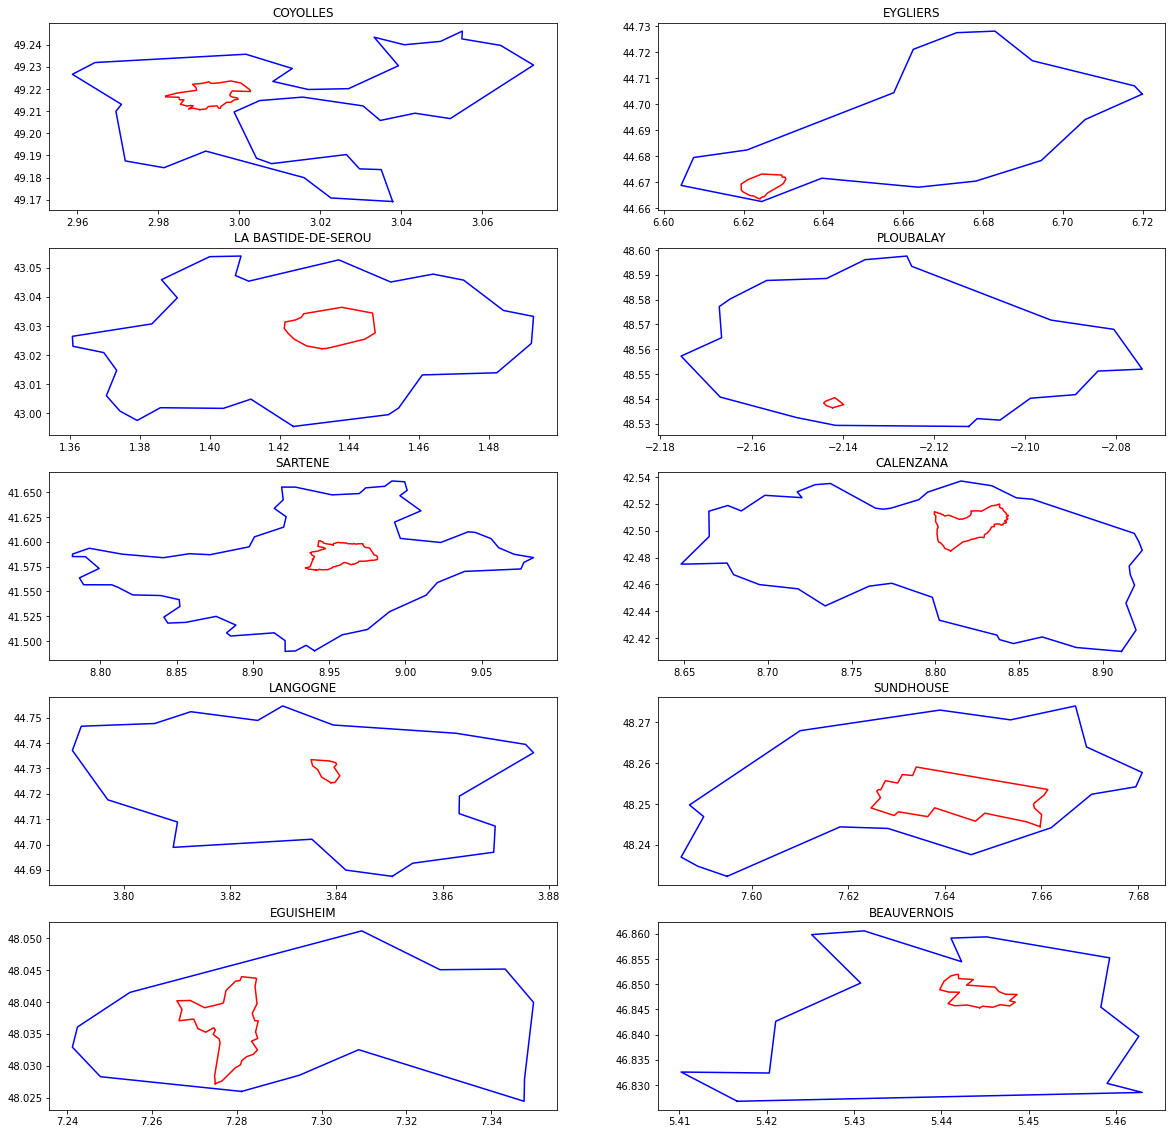

In [26]:
plt.figure(figsize=(20,20))

for i in range(len(polygon_liste)): 
    plt.subplot(5,2,i+1)
    p1 = sha.Polygon(polygon_liste[i][0])
    p2 = sha.Polygon(polygon_liste[i][1])
    plt.plot(*p1.exterior.xy, c='blue')
    plt.plot(*p2.exterior.xy, c='red')
    plt.title(polygon_enclave['Commune'][i])